In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from  sklearn.tree import  plot_tree
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [5]:
loan = pd.read_excel(r'D:\project\loan.xlsx')
loan.head()

,Credit_Score,Employed,Income,Dependent,Loan
0,1,1,1,0,1
1,1,1,1,0,1
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0


* I have to predict weither a person will get a loan or not ?

In [6]:
ada_boost = pd.read_excel(r'D:\project\ada_boost.xlsx')
ada_boost.head()

,Credit_Score,Employed,Income,Dependent,Loan,initial weights
0,1,1,1,0,1,0.066667
1,1,1,1,0,1,0.066667
2,1,1,1,1,0,0.066667
3,1,1,1,1,0,0.066667
4,1,1,1,1,0,0.066667


In [17]:
model = AdaBoostClassifier(n_estimators=3)

In [18]:
x = loan.drop(columns= 'Loan')
y = loan['Loan']

In [19]:
model.fit(x,y)

AdaBoostClassifier(n_estimators=3)

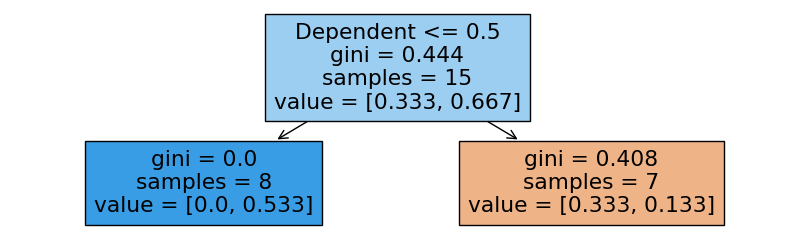

In [20]:
plt.figure(figsize=(10,3))
plot_tree(model[0],feature_names=['Credit_Score', 'Employed', 'Income', 'Dependent'],filled=True)
plt.show()

# Gradiant Boosting

In [22]:
model_GB = GradientBoostingClassifier(n_estimators=2)

In [23]:
model_GB.fit(x,y)

GradientBoostingClassifier(n_estimators=2)

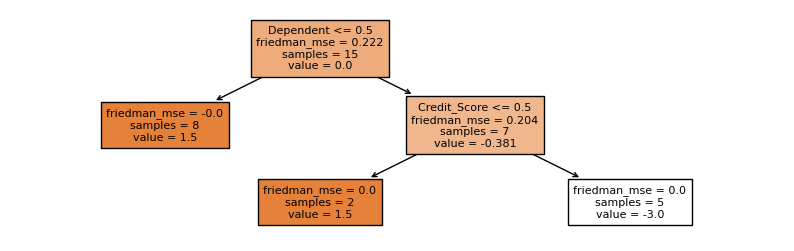

In [26]:
plt.figure(figsize=(10,3))
plot_tree(model_GB.estimators_[0,0],feature_names=['Credit_Score', 'Employed', 'Income', 'Dependent'],filled=True,
         fontsize=8)
plt.show()

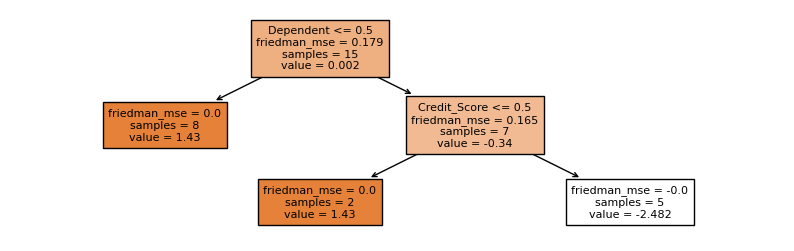

In [27]:
plt.figure(figsize=(10,3))
plot_tree(model_GB.estimators_[1,0],feature_names=['Credit_Score', 'Employed', 'Income', 'Dependent'],filled=True,
         fontsize=8)
plt.show()

# Gradiant Boosting Regressor

In [28]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
# Lets create one small dataset

In [29]:
df = pd.DataFrame({'Exp':[2,3,5,6],
                  'Edu':[1,2,2,3],
                  'Salary':[50000,70000,80000,100000]})

In [30]:
df

,Exp,Edu,Salary
0,2,1,50000
1,3,2,70000
2,5,2,80000
3,6,3,100000


In [33]:
# Step 1 : Initial Leaf
df['Initial_leaf'] = df['Salary'].mean()
df

,Exp,Edu,Salary,Initial_leaf
0,2,1,50000,75000.0
1,3,2,70000,75000.0
2,5,2,80000,75000.0
3,6,3,100000,75000.0


In [34]:
# Calculate the residual
df['Residual_1'] = df['Salary']-df['Initial_leaf']
df

,Exp,Edu,Salary,Initial_leaf,Residual_1
0,2,1,50000,75000.0,-25000.0
1,3,2,70000,75000.0,-5000.0
2,5,2,80000,75000.0,5000.0
3,6,3,100000,75000.0,25000.0


In [35]:
# Descision Tree 1 : Exp , Edu vs Residual_1
model_1 = DecisionTreeRegressor(max_depth=2)
model_1.fit(df[['Exp','Edu']],df['Residual_1'])

DecisionTreeRegressor(max_depth=2)

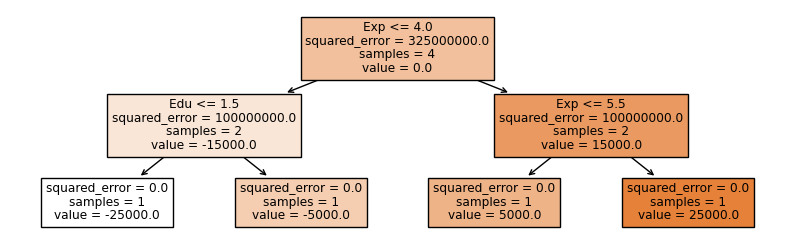

In [38]:
plt.figure(figsize=(10,3))
plot_tree(model_1,feature_names=['Exp','Edu'],filled=True)
plt.show()

In [39]:
# Calculate Output Tree 1
df['Ouput_tree1']=0.1*model_1.predict(df[['Exp','Edu']])
df

,Exp,Edu,Salary,Initial_leaf,Residual_1,Ouput_tree1
0,2,1,50000,75000.0,-25000.0,-2500.0
1,3,2,70000,75000.0,-5000.0,-500.0
2,5,2,80000,75000.0,5000.0,500.0
3,6,3,100000,75000.0,25000.0,2500.0


In [40]:
# Calculate New Prediction
df['New_Prediction1']=df['Initial_leaf']+df['Ouput_tree1']
df

,Exp,Edu,Salary,Initial_leaf,Residual_1,Ouput_tree1,New_Prediction1
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0


In [41]:
# Residual 2
df['Residual_2'] = df['Salary']-df['New_Prediction1']
df

,Exp,Edu,Salary,Initial_leaf,Residual_1,Ouput_tree1,New_Prediction1,Residual_2
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0,-22500.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0,-4500.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0,4500.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0,22500.0


In [42]:
# Descision Tree 2 : Exp , Edu vs Residual_2
model_2 = DecisionTreeRegressor(max_depth=2)
model_2.fit(df[['Exp','Edu']],df['Residual_2'])

DecisionTreeRegressor(max_depth=2)

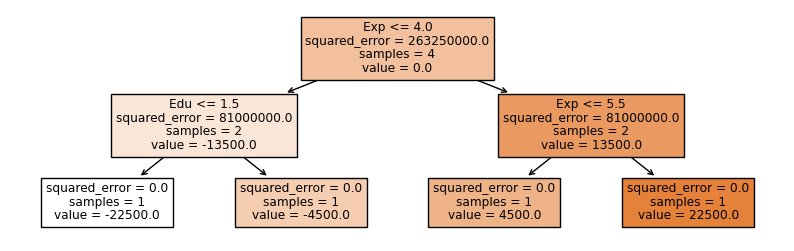

In [43]:
plt.figure(figsize=(10,3))
plot_tree(model_2,feature_names=['Exp','Edu'],filled=True)
plt.show()

In [45]:
# Calculate Output Tree 2
df['Ouput_tree2']=0.1*model_2.predict(df[['Exp','Edu']])
df

,Exp,Edu,Salary,Initial_leaf,Residual_1,Ouput_tree1,New_Prediction1,Residual_2,Ouput_tree2
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0,-22500.0,-2250.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0,-4500.0,-450.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0,4500.0,450.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0,22500.0,2250.0


In [47]:
# Calculate New Prediction _2
df['New_Prediction2']=df['New_Prediction1']+df['Ouput_tree2']
df

,Exp,Edu,Salary,Initial_leaf,Residual_1,Ouput_tree1,New_Prediction1,Residual_2,Ouput_tree2,New_Prediction2
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0,-22500.0,-2250.0,70250.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0,-4500.0,-450.0,74050.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0,4500.0,450.0,75950.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0,22500.0,2250.0,79750.0


In [48]:
# Using Gradiant Boosting
model_gbr = GradientBoostingRegressor(n_estimators=2,
                                     max_depth=2)

In [53]:
model_gbr.fit(df[['Exp','Edu']],df['Salary'])

GradientBoostingRegressor(max_depth=2, n_estimators=2)

In [54]:
model_gbr.predict(df[['Exp','Edu']])

array([70250., 74050., 75950., 79750.])

In [55]:
df['New_Prediction2']

0    70250.0
1    74050.0
2    75950.0
3    79750.0
Name: New_Prediction2, dtype: float64